In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [8]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model

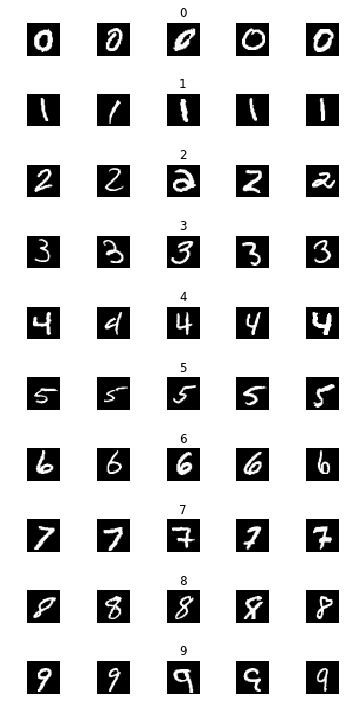

In [5]:
np.random.seed(0)




(X_train, y_train), (X_test, y_test)= mnist.load_data()

assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels in training set."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels in test set."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28 in training set." 
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28 in test set."

num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))


In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255


In [9]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 68s 1ms/step - loss: 0.2837 - acc: 0.9091 - val_loss: 0.0658 - val_acc: 0.9793
Epoch 2/10
54000/54000 [==============================] - 66s 1ms/step - loss: 0.0793 - acc: 0.9756 - val_loss: 0.0432 - val_acc: 0.9867
Epoch 3/10
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0657 - acc: 0.9802 - val_loss: 0.0421 - val_acc: 0.9873
Epoch 4/10
54000/54000 [==============================] - 68s 1ms/step - loss: 0.0551 - acc: 0.9832 - val_loss: 0.0445 - val_acc: 0.9873
Epoch 5/10
54000/54000 [==============================] - 67s 1ms/step - loss: 0.0505 - acc: 0.9842 - val_loss: 0.0442 - val_acc: 0.9885
Epoch 6/10
54000/54000 [=======

(28, 28)


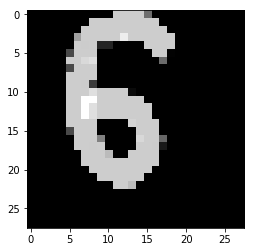

In [13]:
import cv2
imgpath = "C:\\Users\\dhruv\\OneDrive\\Desktop\\6.png"
img=cv2.imread(imgpath)
img = cv2.resize(img, (28, 28))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))
print(img.shape)

In [14]:
img = img/255
img = img.reshape(1,28,28,1)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [6]


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.039017597084474075
Test accuracy: 0.9894


(1, 24, 24, 30)
(1, 10, 10, 15)


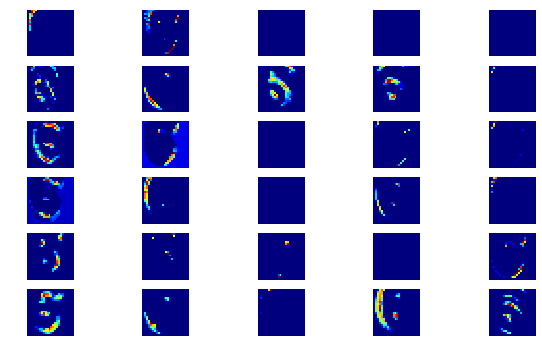

In [16]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)

print(visual_layer1.shape)
print(visual_layer2.shape)

#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')


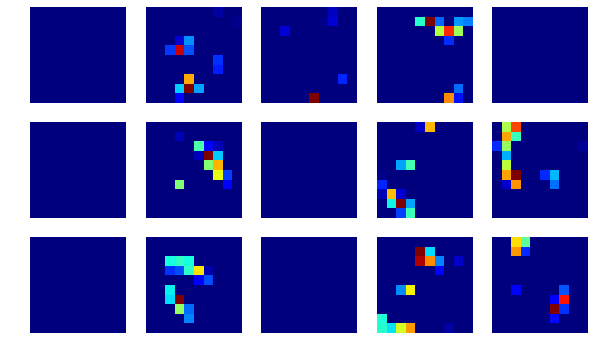

In [17]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')